# Data Augmentation

In this notebook, we create some data augmentation usefull for the challenge that doesn't exist by default in the fastai library. The augmentation that we will do on the images must be carefully picked because applying the wrong transformation on a REAL face can make it appear FALSE. We currently implemented:

- Gaussian Blur
- Poisson + Gaussian noise (the closest from photography noise)
- JPG compression artifacts

/!\ It is important to ut the transforms in the correct order (the one appearing physically), otherwise some will interact (e.g noise then blurring)

In [103]:
#default_exp nb_09b

In [104]:
from fastai.core import *
from fastai.vision import *
from kgl_deepfake.nb_00 import *
from kgl_deepfake.nb_01a import *
from kgl_deepfake.nb_02a import *
from kgl_deepfake.nb_03 import *

import albumentations as A

### Get the Data

In [105]:
SOURCE = Path('../data_face/train_sample_faces')

In [106]:
src = ImageList.from_folder(SOURCE).split_by_rand_pct()

In [107]:
lab = r'([A-Z]+).png$'

In [108]:
bs, sz = 32, 128

In [109]:
def tensor2np(x):
    np_image = x.cpu().permute(1, 2, 0).numpy()
    np_image = (np_image * 255).astype(np.uint8)
    
    return np_image

In [110]:
def alb_tfm2fastai(alb_tfm, order):
    def _alb_transformer(x):
        # tensor to numpy
        np_image = tensor2np(x)

        # apply albumentations
        transformed = alb_tfm(image=np_image)['image']

        # back to tensor
        tensor_image = pil2tensor(transformed, np.float32)
        tensor_image.div_(255)

        return tensor_image

    transformer = TfmPixel(_alb_transformer, order=order)
    
    return transformer()

In [111]:
tfms = []

In [112]:
tfms += [alb_tfm2fastai(A.MotionBlur(p=.2), order=11)]

In [113]:
tfms += [alb_tfm2fastai(A.GaussNoise(p=.2), order=12)]

In [114]:
tfms += [alb_tfm2fastai(A.JpegCompression(p=.2, quality_lower=50), order=13)]

In [115]:
def get_data(bs,size):
    data = (src.label_from_re(lab)
           .transform(get_transforms(xtra_tfms=tfms),size=size, padding_mode="border")
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

In [116]:
data = get_data(bs, sz)

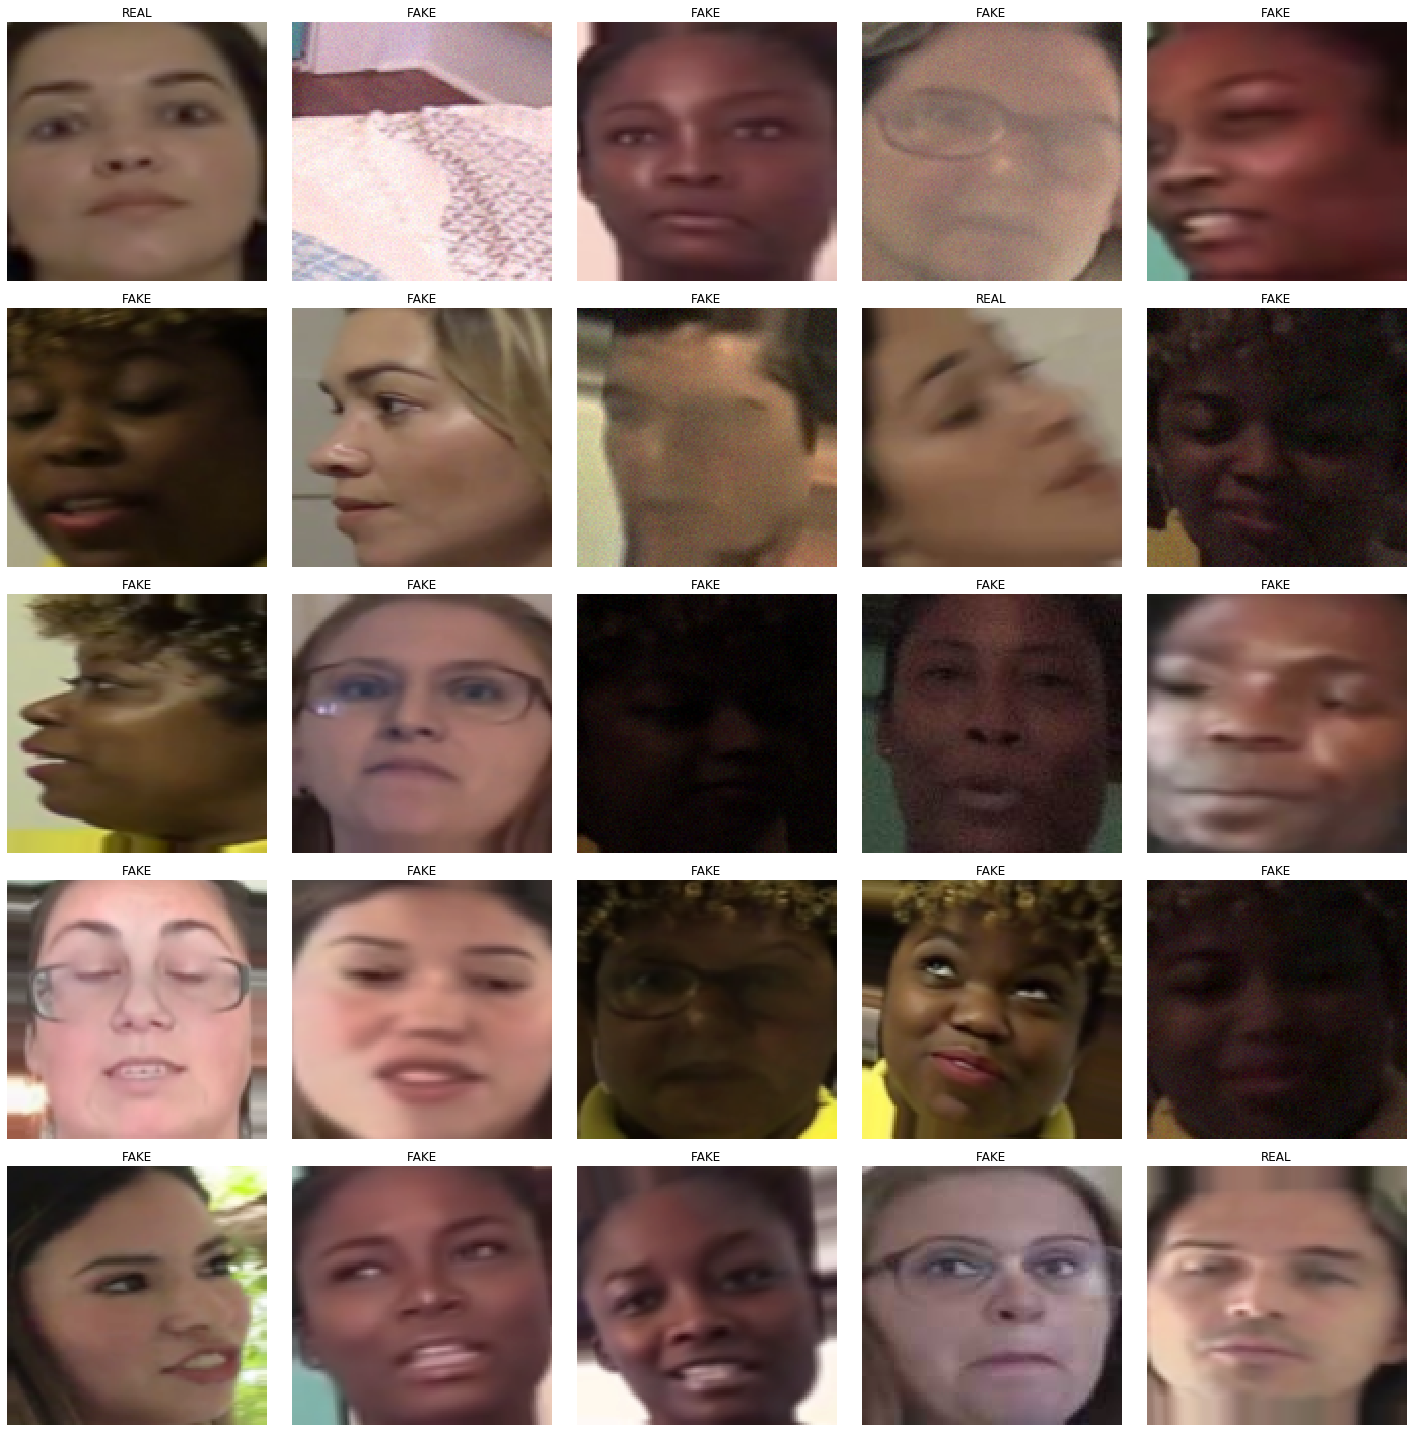

In [117]:
data.show_batch()

## Fin

In [27]:
from nbdev.export import *
notebook2script()

Converted 00_data.ipynb.
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
Converted 00a_video_compression.ipynb.
Converted 01_face_detection.ipynb.
Converted 01a_faces_probs_examples.ipynb.
Converted 01a_faces_probs_examples_hv.ipynb.
Converted 02_fix_luminosity.ipynb.
Converted 02a_create_faceimage_dataset.ipynb.
Converted 02bis_Create_Dataset.ipynb.
Converted 02c_faces_different_dfdc_zips.ipynb.
Converted 03_models.ipynb.
Converted 04_Baseline_Classification.ipynb.
Converted 04_Classification.ipynb.
Converted 04a_classification_v